# Project For CSI Data Science

## Bank Customer Churn Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
from scipy import stats
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("Churn_Modelling.csv") 

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
data.shape

(10000, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.var()

CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [98]:
data.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,39.238389
Male,38.658237


In [99]:
data.groupby("Gender").agg({"Exited": "mean"})

,Exited
Gender,
Female,0.250715
Male,0.164559


In [100]:
data.groupby("Geography").agg({"Exited": "mean"})

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [101]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [102]:
churn = data[data["Exited"] == 1]

In [103]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [104]:
churn.shape

(2037, 11)

In [105]:
churn.groupby("Gender").agg({"Exited": "count"})

,Exited
Gender,
Female,1139
Male,898


In [106]:
churn.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
France,810
Germany,814
Spain,413


In [107]:
non_churn = data[data["Exited"] == 0]

In [109]:
non_churn.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
France,4204
Germany,1695
Spain,2064


# Data Visualisation

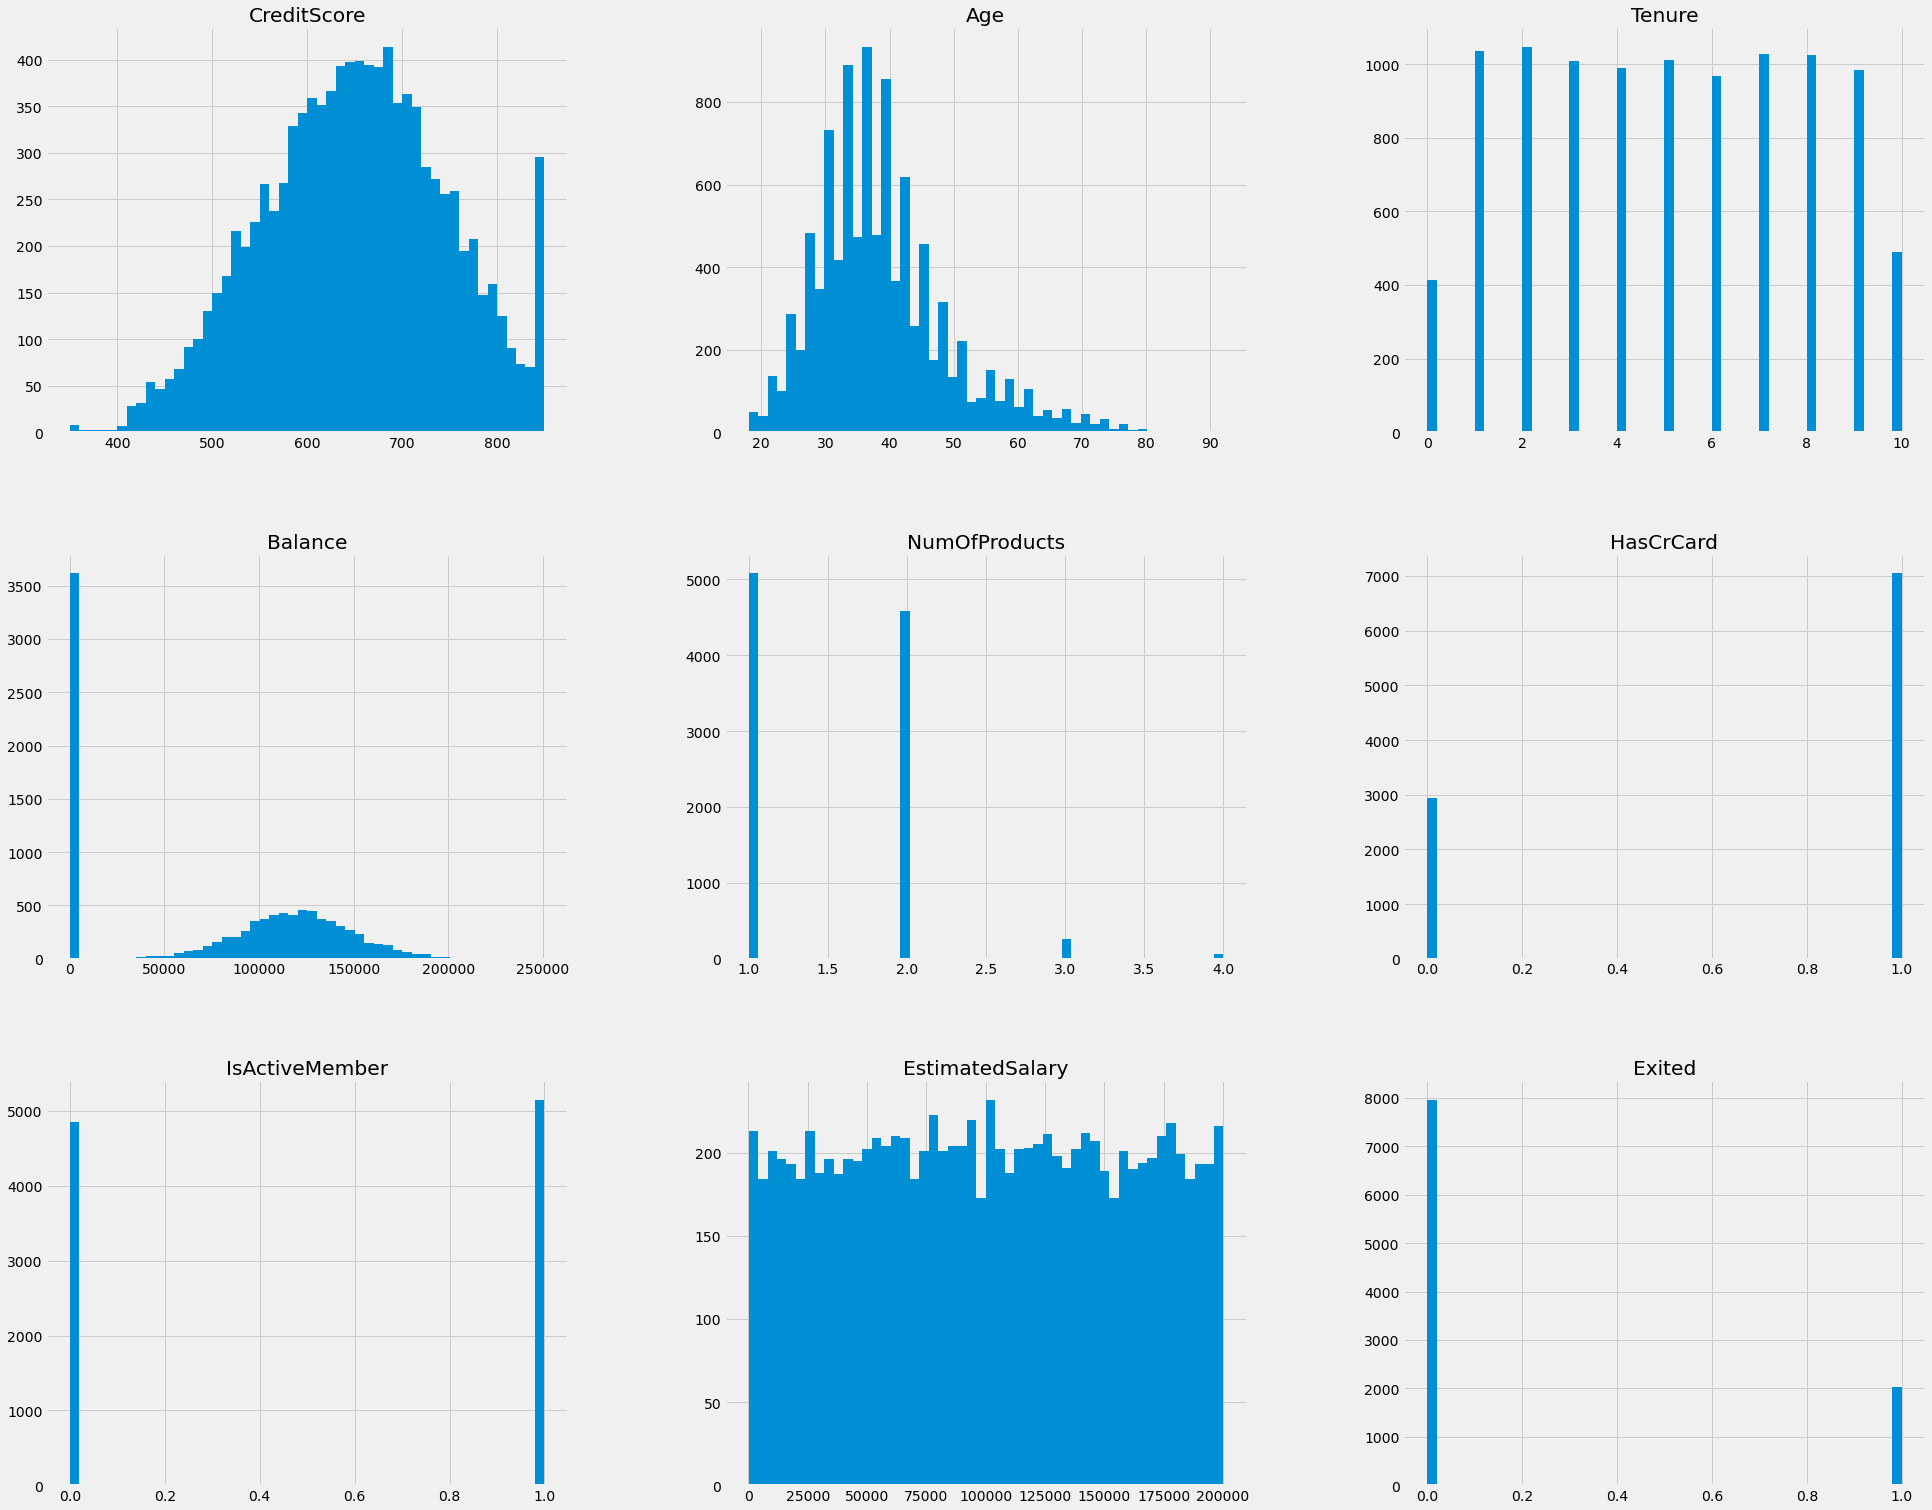

In [9]:
data.hist(bins=50, figsize=(30,25)) 
plt.show()

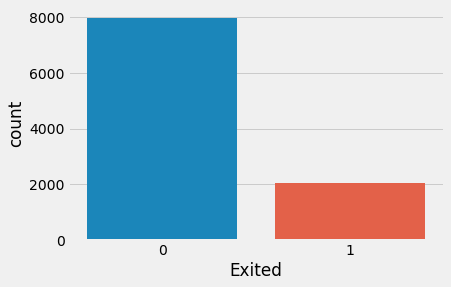

In [10]:
sns.countplot(x="Exited", data=data)
plt.show()

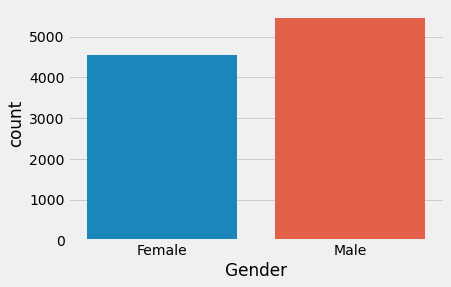

In [11]:
sns.countplot(x="Gender", data=data)
plt.show()

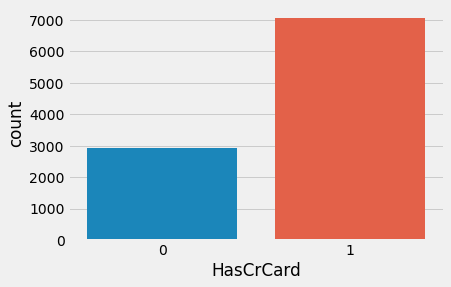

In [12]:
sns.countplot(x="HasCrCard", data=data)
plt.show()

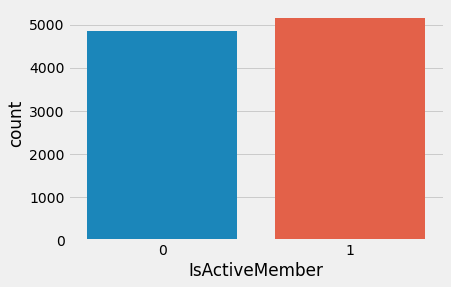

In [13]:
sns.countplot(x="IsActiveMember", data=data)
plt.show()

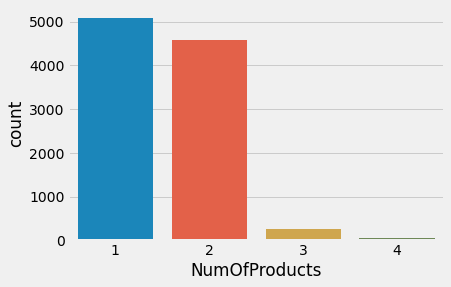

In [14]:
sns.countplot(x="NumOfProducts", data=data)
plt.show()

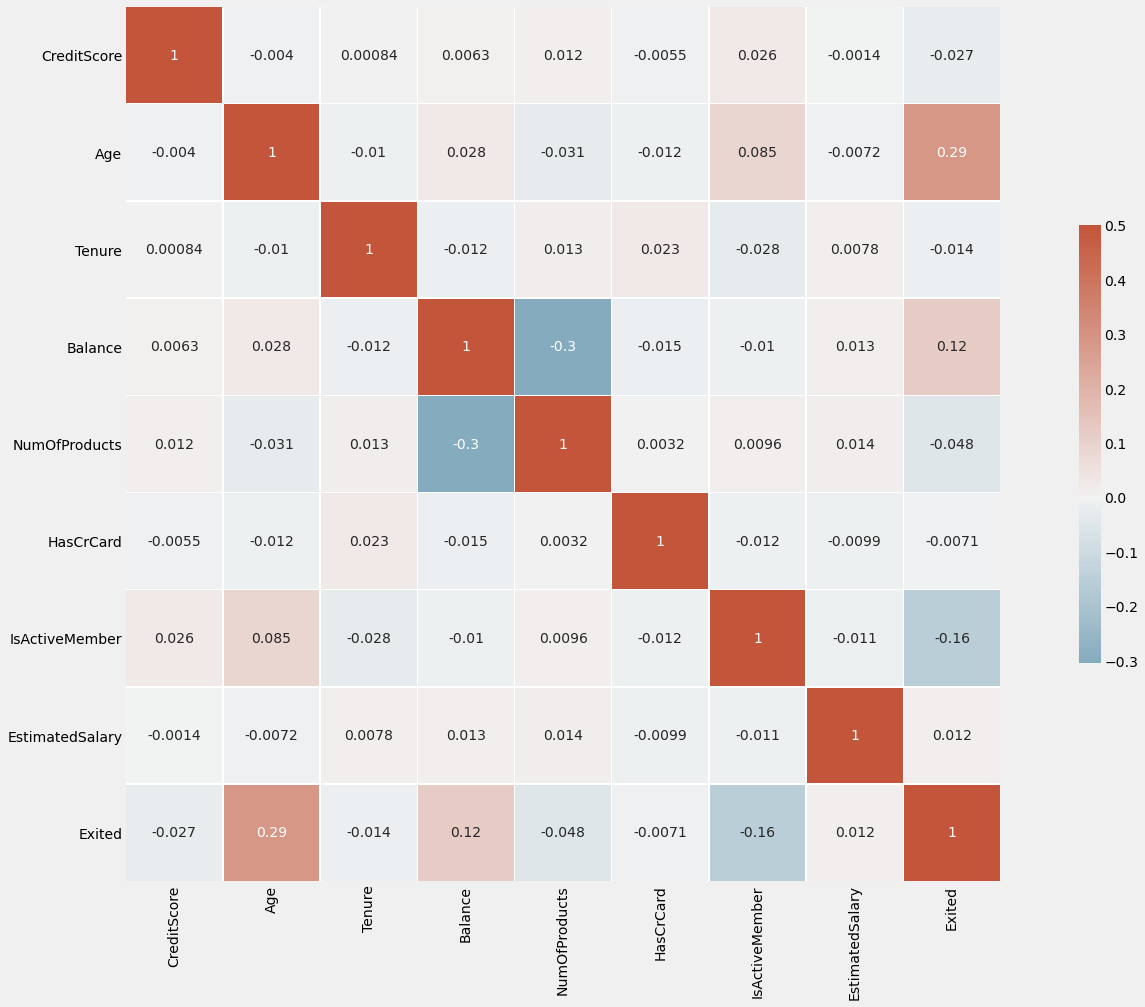

In [15]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.5, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [16]:
High_corr = corr_matrix.nlargest(4, 'Exited')['Exited'].index
High_corr

Index(['Exited', 'Age', 'Balance', 'EstimatedSalary'], dtype='object')

In [17]:
corr_matrix["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [18]:
new_df = data.copy()

In [19]:
def IQR(column_name):
    Q1 = new_df[column_name].quantile(0.12)
    Q3 = new_df[column_name].quantile(0.88)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    values_upper = new_df[new_df[column_name] > upper_limit]
    values_lower = new_df[new_df[column_name] < lower_limit]
    
    return values_upper, values_lower, upper_limit, lower_limit

In [20]:
def upper(column_name):
    if values_upper.shape[0] > 0:
        print("Outliers upper than the higher limit: ")
        return new_df[new_df[column_name] > upper_limit]
    else:
        print("There are no values higher than the upper limit!")

In [21]:
def lower(column_name):
    if values_lower.shape[0] > 0:
        print("Outliers lower than the higher limit: ")
        return new_df[new_df[column_name] < lower_limit]
    else:
        print("There are no values lower than the lower limit!")

In [22]:
def outliers_del(column_name):
    
    global new_df
    new_df = new_df[new_df[column_name] < upper_limit]
    new_df = new_df[new_df[column_name] > lower_limit]
    print("the old data shape is :", data.shape)
    print("the new data shape is :", new_df.shape)

In [23]:

def plot(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(16,5))
   
    plt.subplot(1,2,1)
    sns.boxplot(data[column_name],palette="rocket")
    plt.show()

In [24]:
def outlier_compare(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    sns.boxplot(data[column_name], palette="rocket")
    plt.subplot(2,2,2)
    sns.boxplot(new_df[column_name], palette="rocket")
    plt.show()

In [25]:
Upper_Outliers_columns = []
Lower_Outliers_columns = []
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for column in new_df:
    if new_df[column].dtype in numeric_dtypes:
        values_upper, values_lower, upper_limit, lower_limit = IQR(column)
        if values_upper.shape[0] > 0:
            Upper_Outliers_columns.append(column)
        if values_lower.shape[0] > 0:
            Lower_Outliers_columns.append(column)

In [26]:
print('Columns upper the limit is: ', Upper_Outliers_columns)
print('Columns lower the limit is: ', Lower_Outliers_columns)

Columns upper the limit is:  ['Age', 'NumOfProducts']
Columns lower the limit is:  []


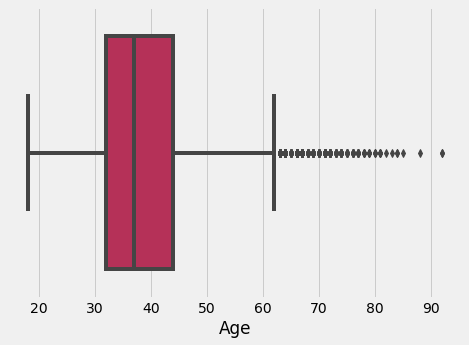

In [27]:
plot('Age')

In [28]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Age')

In [29]:
upper('Age')

Outliers upper than the higher limit: 


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2458,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


In [30]:
lower('Age')

There are no values lower than the lower limit!


In [31]:
outliers_del('Age')

the old data shape is : (10000, 11)
the new data shape is : (9997, 11)


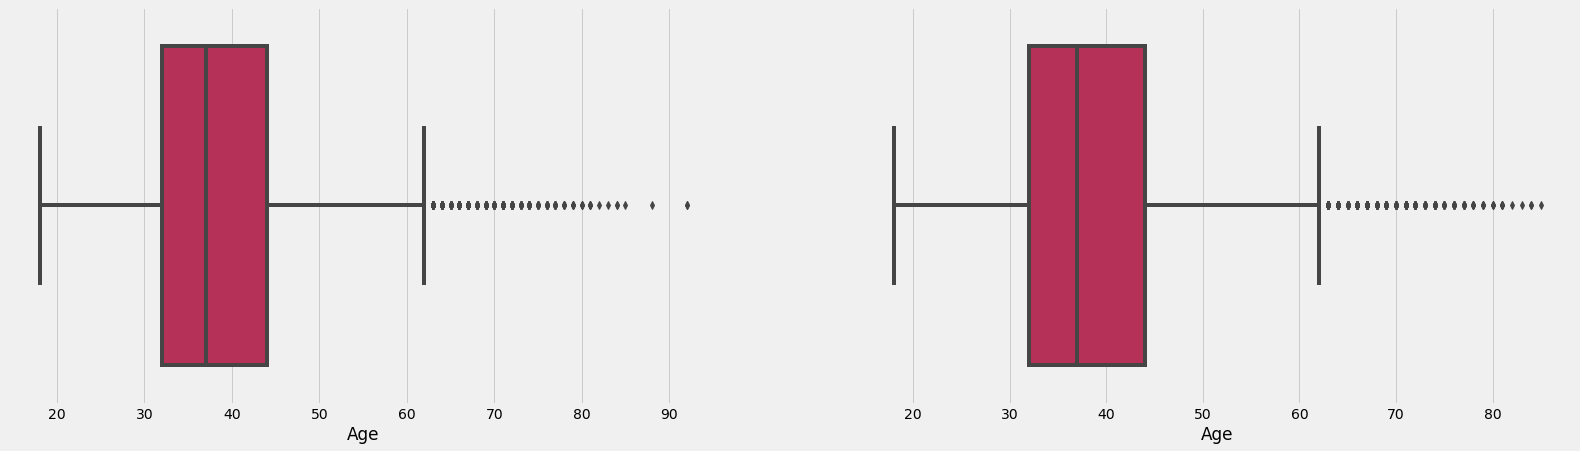

In [32]:
outlier_compare('Age')

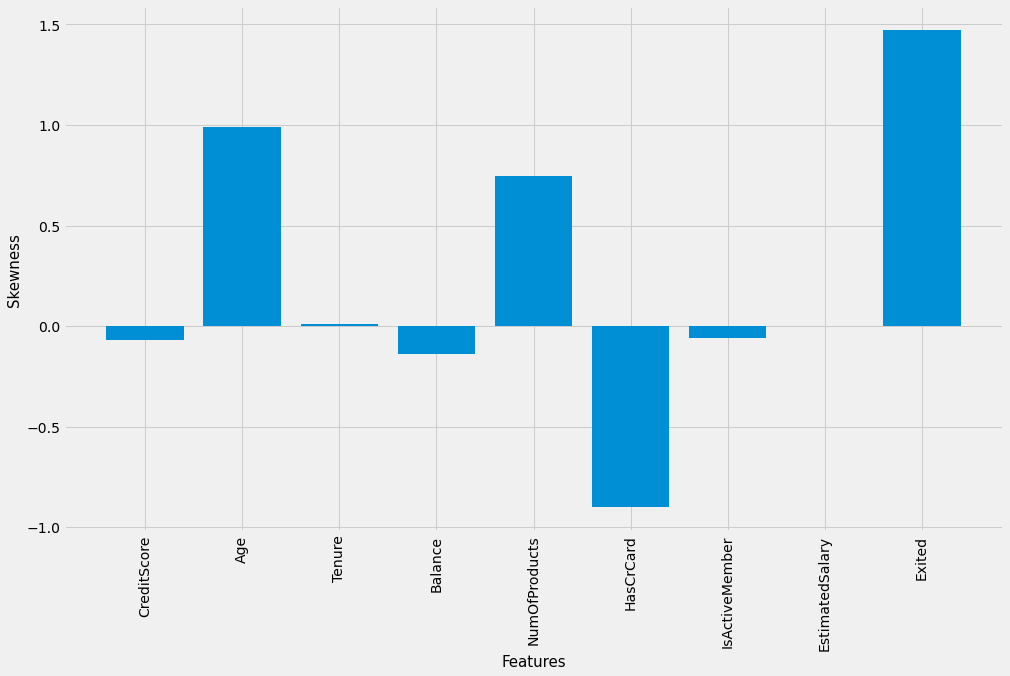

In [33]:
from scipy.stats import skew

skewness_list = {}
for i in new_df:
    if new_df[i].dtype != "object":
        skewness_list[i] = skew(new_df[i])

skewness = pd.DataFrame({'Skew' :skewness_list})
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,9))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.xticks(rotation='90')
plt.bar(range(len(skewness_list)), list(skewness_list.values()), align='center')
plt.xticks(range(len(skewness_list)), list(skewness_list.keys()))

plt.show()

In [34]:
skewness_list

{'CreditScore': -0.07141098316751554,
 'Age': 0.9900975040091681,
 'Tenure': 0.010677171556366927,
 'Balance': -0.14093893357951057,
 'NumOfProducts': 0.7457646513129027,
 'HasCrCard': -0.9017378440892351,
 'IsActiveMember': -0.059844718318435124,
 'EstimatedSalary': 0.0017419755543737416,
 'Exited': 1.4709221378016983}

In [35]:
X = new_df.drop("Exited", axis=1)

In [36]:
y = new_df['Exited'].copy()

In [37]:
X.shape, y.shape

((9997, 10), (9997,))

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, shuffle=True, random_state=42, stratify=y)

In [39]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
 
from sklearn.feature_selection import SelectPercentile, chi2

from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
 
from sklearn import set_config
set_config(display='diagram')

In [40]:
OHE = OneHotEncoder()
MMS = MinMaxScaler()
cv = StratifiedKFold(5, random_state=1, shuffle=True)

In [41]:
column_trans = make_column_transformer(
    (OHE, ['Geography', 'Gender']),
    (MMS, ['CreditScore', 'Balance', 'EstimatedSalary']),
    remainder='passthrough')

In [42]:
column_trans.fit_transform(X_train)

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 2., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 0., ..., 2., 1., 1.],
       [1., 0., 0., ..., 2., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.]])

In [43]:
RF = RandomForestClassifier(random_state=4, criterion='gini', max_depth=10, max_features='auto')

In [44]:
RF_pipe = make_pipeline(column_trans, RF)

In [45]:
RF_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, random_state=4))])

In [46]:
cross_val_score(RF_pipe, X_train, y_train, cv=cv, scoring='accuracy').mean()

0.8603709792709079

In [47]:
RF_pipe.fit(X_train, y_train);

In [48]:
RF_pipe.score(X_train, y_train)

0.9012433900242961

In [49]:
RF_pred = RF_pipe.predict(X_train)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, RF_pred)

array([[5533,   38],
       [ 653,  773]], dtype=int64)

In [51]:
LR = LogisticRegression(random_state=4, C=1, max_iter=1000, multi_class='auto', penalty='l1',solver='saga')

In [52]:
LR_pipe = make_pipeline(column_trans, LR)

In [53]:
LR_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary'])])),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=1000, penalty='l1',
                                    random_state=4, solver='saga'))])

In [54]:
cross_val_score(LR_pipe, X_train, y_train, cv=cv, scoring='accuracy').mean()

0.8113497396099254

In [55]:
LR_pipe.fit(X_train, y_train);

In [56]:
LR_pipe.score(X_train, y_train)

0.8109189652708304

In [57]:
LR_pred = LR_pipe.predict(X_train)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_pred)

array([[5389,  182],
       [1141,  285]], dtype=int64)

In [59]:
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=9, weights='uniform')

In [60]:
KNN_pipe = make_pipeline(column_trans, KNN)

In [61]:
KNN_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Geography', 'Gender']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['CreditScore', 'Balance',
                                                   'EstimatedSalary'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [62]:
cross_val_score(KNN_pipe, X_train, y_train, cv=cv, scoring='accuracy').mean()

0.8212120902685592

In [63]:
KNN_pipe.fit(X_train, y_train);

In [64]:
KNN_pipe.score(X_train, y_train)

0.8470773188509361

In [65]:
KNN_pred = KNN_pipe.predict(X_train)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, KNN_pred)

array([[5399,  172],
       [ 898,  528]], dtype=int64)

In [67]:
hyper_params = {}
hyper_params['randomforestclassifier__n_estimators'] = [150, 200, 250]
hyper_params['randomforestclassifier__max_depth'] = [7, 8, 9, 10]
hyper_params['randomforestclassifier__criterion'] = ['gini','entropy']
hyper_params['randomforestclassifier__max_features'] = ['auto', 'sqrt', 'log2']

In [68]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RF_pipe, hyper_params, cv=cv, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train);

In [69]:
grid.best_score_

0.8609426120698458

In [70]:
grid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__n_estimators': 250}

In [71]:
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [72]:
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
71,{'randomforestclassifier__criterion': 'entropy...,0.860943,1
68,{'randomforestclassifier__criterion': 'entropy...,0.860943,1
65,{'randomforestclassifier__criterion': 'entropy...,0.860943,1
24,"{'randomforestclassifier__criterion': 'gini', ...",0.860372,4
21,"{'randomforestclassifier__criterion': 'gini', ...",0.860372,4
...,...,...,...
41,{'randomforestclassifier__criterion': 'entropy...,0.855798,67
38,{'randomforestclassifier__criterion': 'entropy...,0.855798,67
8,"{'randomforestclassifier__criterion': 'gini', ...",0.855798,70
2,"{'randomforestclassifier__criterion': 'gini', ...",0.855798,70


In [73]:
hyper_params = {}
hyper_params['logisticregression__penalty'] = ['l1', 'l2']
hyper_params['logisticregression__C'] = [.001, .01, .1, 1]
hyper_params['logisticregression__solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyper_params['logisticregression__max_iter'] = [100, 1000]

In [74]:
grid = GridSearchCV(LR_pipe, hyper_params, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train);

In [75]:
grid.best_score_

0.812207393035842

In [76]:
grid.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [77]:
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [78]:
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
42,"{'logisticregression__C': 0.1, 'logisticregres...",0.812207,1
52,"{'logisticregression__C': 0.1, 'logisticregres...",0.812207,1
57,"{'logisticregression__C': 0.1, 'logisticregres...",0.811921,3
47,"{'logisticregression__C': 0.1, 'logisticregres...",0.811921,3
79,"{'logisticregression__C': 1, 'logisticregressi...",0.811493,5
...,...,...,...
40,"{'logisticregression__C': 0.1, 'logisticregres...",NaN,76
30,"{'logisticregression__C': 0.01, 'logisticregre...",NaN,77
31,"{'logisticregression__C': 0.01, 'logisticregre...",NaN,78
63,"{'logisticregression__C': 1, 'logisticregressi...",NaN,79


In [79]:
hyper_params = {}
hyper_params['kneighborsclassifier__n_neighbors'] = [5, 6, 7, 8, 9]
hyper_params['kneighborsclassifier__weights'] = ['uniform','distance']
hyper_params['kneighborsclassifier__algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyper_params['kneighborsclassifier__leaf_size'] = [30, 40, 50]

In [80]:
grid = GridSearchCV(KNN_pipe, hyper_params, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train);

In [81]:
grid.best_score_

0.8212120902685592

In [82]:
grid.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__weights': 'uniform'}

In [83]:
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [84]:
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
18,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.821212,1
38,{'kneighborsclassifier__algorithm': 'ball_tree...,0.821212,1
78,"{'kneighborsclassifier__algorithm': 'kd_tree',...",0.821212,1
98,"{'kneighborsclassifier__algorithm': 'brute', '...",0.821212,1
28,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.821212,1
...,...,...,...
11,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.808063,109
21,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.808063,109
91,"{'kneighborsclassifier__algorithm': 'brute', '...",0.808063,109
111,"{'kneighborsclassifier__algorithm': 'brute', '...",0.808063,109


In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [86]:
RF_pred = RF_pipe.predict(X_test)

In [87]:
accuracy_score(y_test, RF_pred)

0.8686666666666667

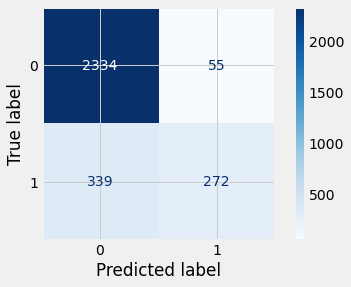

In [88]:
plot_confusion_matrix(RF_pipe, X_test, y_test, cmap=plt.cm.Blues)  
plt.show() 

In [89]:
roc_auc_score(y_test, RF_pred, multi_class='ovo')

0.7110748322062591

In [90]:
KNN_pred = KNN_pipe.predict(X_test)

In [91]:
accuracy_score(y_test, KNN_pred)

0.8286666666666667

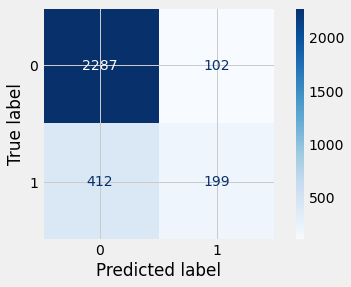

In [92]:
plot_confusion_matrix(KNN_pipe, X_test, y_test, cmap=plt.cm.Blues)  
plt.show() 

In [93]:
LR_pred = LR_pipe.predict(X_test)

In [94]:
accuracy_score(y_test, LR_pred)

0.8116666666666666

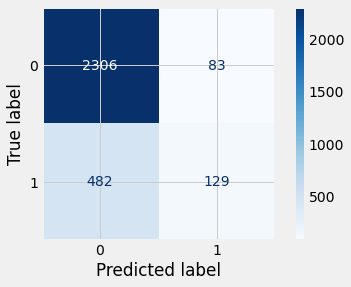

In [95]:
plot_confusion_matrix(LR_pipe, X_test, y_test, cmap=plt.cm.Blues)  
plt.show() 

# Result 

### Accuracy Score of Random Forest is 86.86%
### Accuracy Score of k-nearest neighbor is 82.86%
### Accuracy Score of Logistic Regression is 81.16%